In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

Packages for Mathematical Computation and visualization imported!


In [2]:
df1 = pd.read_csv("datasets\cleanedbasic\wolves18-19.csv")
df2 = pd.read_csv("datasets\cleanedbasic\wolves19-20.csv")

In [3]:
df2.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
26,Owen Otasowie,us USA,MF,18.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Taylor Perry,eng ENG,MF,18.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,John Ruddy,eng ENG,GK,32.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Squad Total,NaN,NaN,26.6,38,418,3420.0,38.0,49.0,34.0,...,2.08,54.1,51.0,37.5,88.5,1.42,0.99,2.41,1.34,2.33
30,Opponent Total,NaN,NaN,26.5,38,418,3420.0,38.0,39.0,28.0,...,1.74,38.0,35.5,26.1,61.6,1.00,0.69,1.69,0.94,1.62


In [4]:
df1.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
18,Léo Bonatini,br BRA,FW,24.0,7,0,135,1.5,0,1,...,0.67,1.3,1.3,0.1,1.4,0.85,0.09,0.94,0.85,0.94
19,Max Kilman,eng ENG,DF,21.0,1,0,1,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
20,Will Norris,eng ENG,GK,24.0,1,0,1,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
21,Squad Total,NaN,NaN,26.1,38,418,3420,38.0,46,35,...,2.03,52.1,49.0,39.4,88.4,1.37,1.04,2.41,1.29,2.33
22,Opponent Total,NaN,NaN,26.8,38,418,3420,38.0,42,32,...,1.87,42.1,39.0,27.7,66.7,1.11,0.73,1.84,1.03,1.76


In [5]:
df1.shape

(23, 29)

In [6]:
df2.shape

(31, 29)

In [7]:
df1 = df1[df1['Min'] > 0]
df2 = df2[df2['Min'] > 0]

In [8]:
dftotals1 = df1.copy()
dftotals2 = df2.copy()

df1 = df1.iloc[:-2]
df2 = df2.iloc[:-2]

In [9]:
df1.dtypes

Player            object
Nation            object
Pos               object
Age              float64
MP                 int64
Starts             int64
Min                int64
90s              float64
Gls                int64
Ast                int64
G-PK               int64
PK                 int64
PKatt              int64
CrdY               int64
CrdR               int64
Per90Gls         float64
Per90Ast         float64
Per90G+A         float64
Per90G-PK        float64
Per90G+A-PK      float64
xG               float64
npxG             float64
xA               float64
npxG+xAG         float64
Per90xG          float64
Per90xA          float64
Per90xG+xA       float64
Per90npxG        float64
Per90npxG+xAG    float64
dtype: object

### Wolverampton Wanderers First Season VS Second Season Comparison

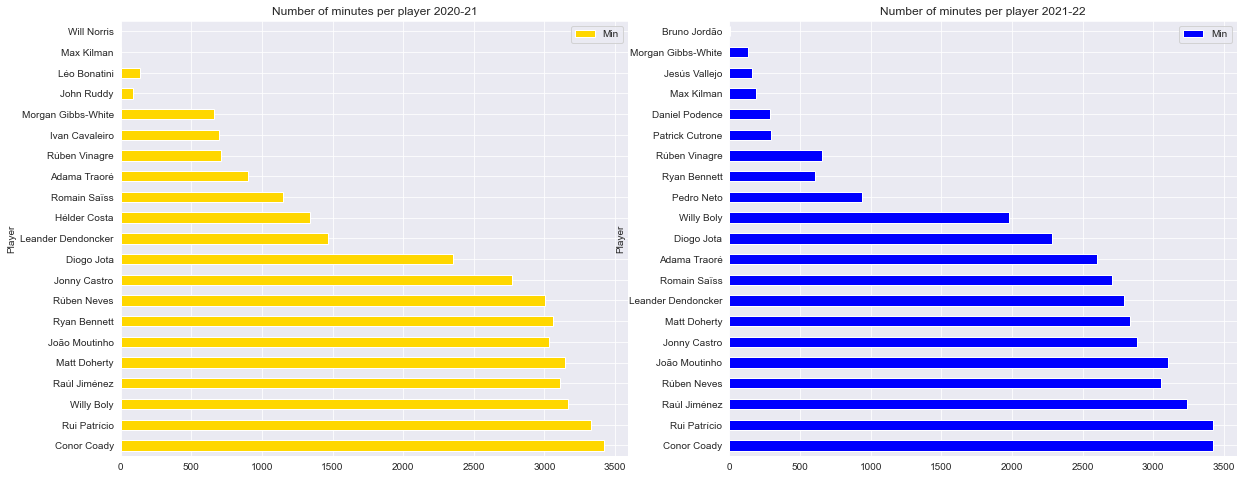

In [10]:
# first let's investigate squad turnover
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
df1.plot.barh(x = 'Player', y = 'Min', ax = ax1, title = 'Number of minutes per player 2020-21',
             color = 'gold')
df2.plot.barh(x = 'Player', y = 'Min', ax = ax2, title = 'Number of minutes per player 2021-22',
             color = 'blue')
plt.show()

In [11]:
print("The number of players in Wolves's first season squad was: " + str(len(df1.index)))
print("The number of players in Wolves's second season squad was: " + str(len(df2.index)))

The number of players in Wolves's first season squad was: 21
The number of players in Wolves's second season squad was: 21


In [12]:
print("Mean minutes played in Wolves's first season squad was: " + str(df1['Min'].mean()))
print("Mean minutes played in Wolves's second season squad was: " + str(df2['Min'].mean()))

Mean minutes played in Wolves's first season squad was: 1788.0
Mean minutes played in Wolves's second season squad was: 1790.5238095238096


##### Let's look at performance metrics now. Firstly, we will focus on expected goals.

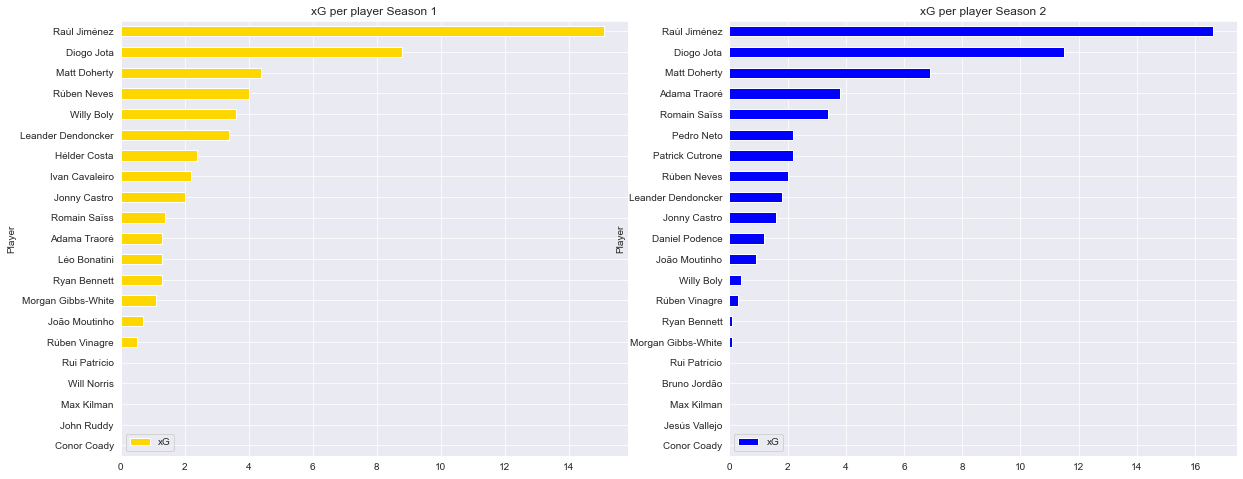

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('xG')
df_c2 = df2.sort_values('xG')
df_c1.plot.barh(x = 'Player', y = 'xG', ax = ax1, title = 'xG per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'xG', ax = ax2, title = 'xG per player Season 2',
             color='blue')
plt.show()

In [14]:
print("Team xG in Wolves's first season squad was: " + str(sum(df1['xG'])))
print("Team xG in Wolves's second season squad was: " + str(sum(df2['xG'])))

Team xG in Wolves's first season squad was: 53.5
Team xG in Wolves's second season squad was: 55.00000000000001


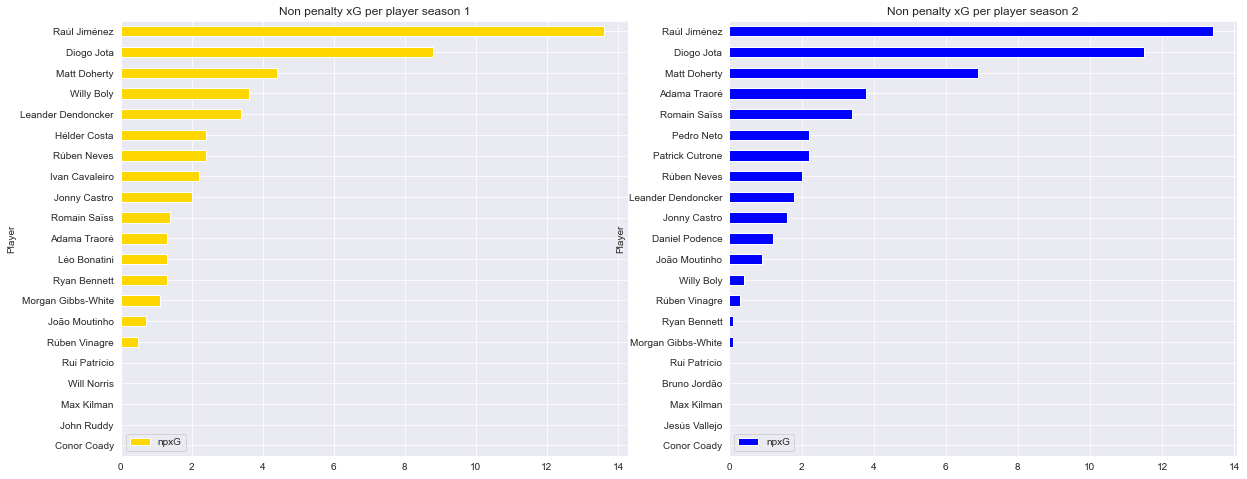

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('npxG')
df_c2 = df2.sort_values('npxG')
df_c1.plot.barh(x = 'Player', y = 'npxG', ax= ax1, title='Non penalty xG per player season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'npxG', ax= ax2, title='Non penalty xG per player season 2',
             color='blue')
plt.show()

In [16]:
print("Non penalty team xG in Wolves's first season squad was: " + str(sum(df1['npxG'])))
print("Non penalty team xG in Wolves's second season squad was: " + str(sum(df2['npxG'])))

Non penalty team xG in Wolves's first season squad was: 50.39999999999999
Non penalty team xG in Wolves's second season squad was: 51.80000000000001


#### xG VS Actual Difference

In [17]:
df1['Actual - xG'] = df1['Gls'] - df1['xG']
df2['Actual - xG'] = df2['Gls'] - df2['xG']

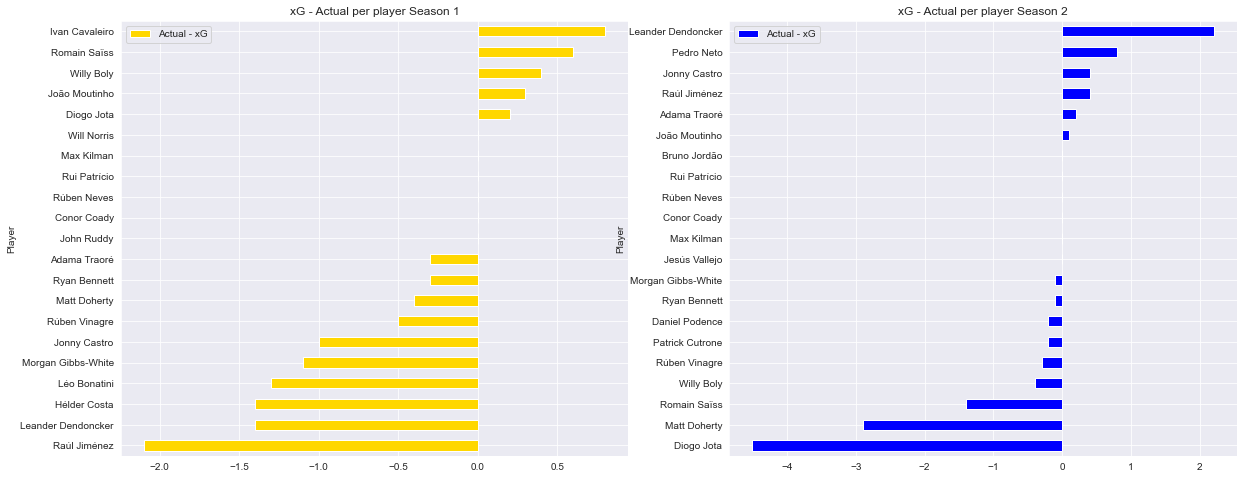

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('Actual - xG')
df_c2 = df2.sort_values('Actual - xG')
df_c1.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax1, title='xG - Actual per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax2, title='xG - Actual per player Season 2',
             color='blue')
plt.show()

### Let's now investigate Assists and expected assists (xA). This will allow us to see did Leeds United create high quality chances and if this was potentially a factor in their drop off across the two seasons.

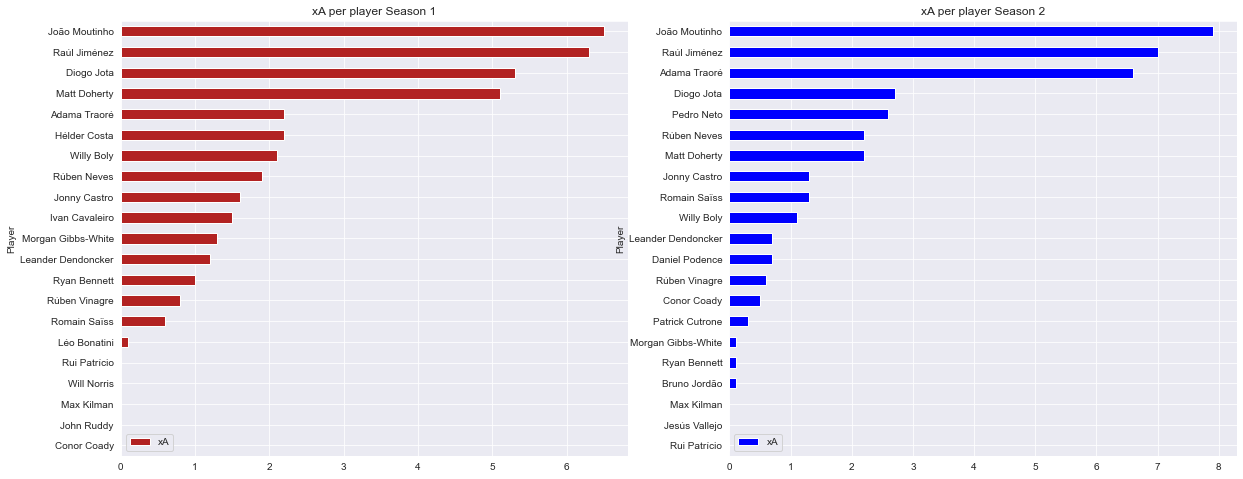

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('xA')
df_c2 = df2.sort_values('xA')
df_c1.plot.barh(x = 'Player', y = 'xA', ax = ax1, title = 'xA per player Season 1',
             color = 'firebrick')
df_c2.plot.barh(x = 'Player', y = 'xA', ax = ax2, title = 'xA per player Season 2',
             color = 'blue')
plt.show()

In [20]:
print("Team xA in Wolves's first season squad was: " + str(sum(df1['xA'])))
print("Team xA in Wolves's second season squad was: " + str(sum(df2['xA'])))

Team xA in Wolves's first season squad was: 39.7
Team xA in Wolves's second season squad was: 38.000000000000014


#### xA VS Actual Assists

In [21]:
df1['Actual - xA'] = df1['Ast'] - df1['xA']
df2['Actual - xA'] = df2['Ast'] - df2['xA']

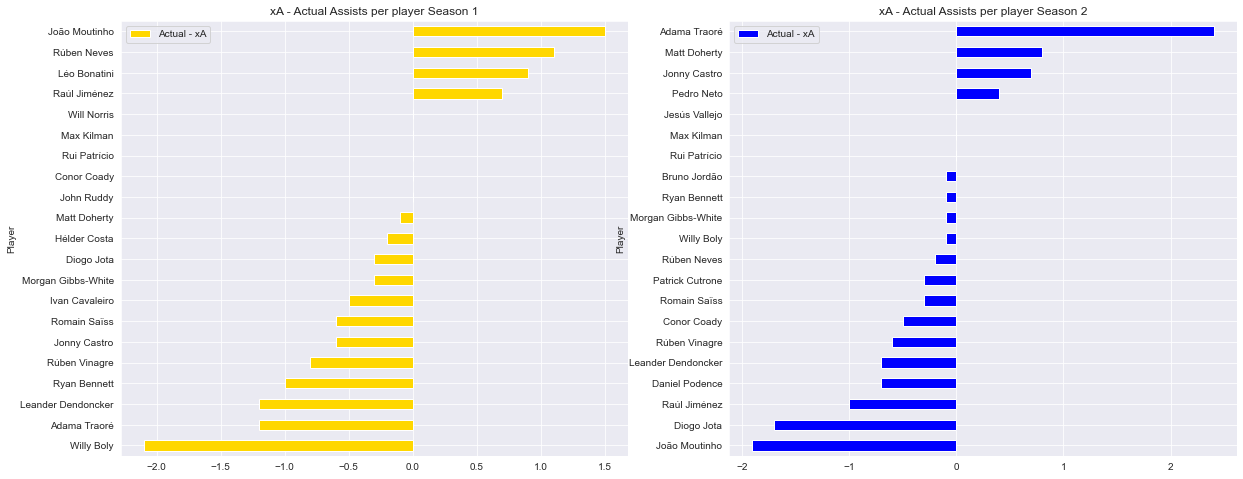

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Actual - xA')
df_c2 = df2.sort_values('Actual - xA')
df_c1.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax1, title='xA - Actual Assists per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax2, title='xA - Actual Assists per player Season 2',
             color='blue')
plt.show()

In [23]:
print("Team actual minus xA in Wolves's first season squad was: " + str(sum(df1['Actual - xA'])))
print("Team actual minus xA in Wolves's second season squad was: " + str(sum(df2['Actual - xA'])))

Team actual minus xA in Wolves's first season squad was: -4.699999999999999
Team actual minus xA in Wolves's second season squad was: -4.000000000000001


### Per 90 comparisons

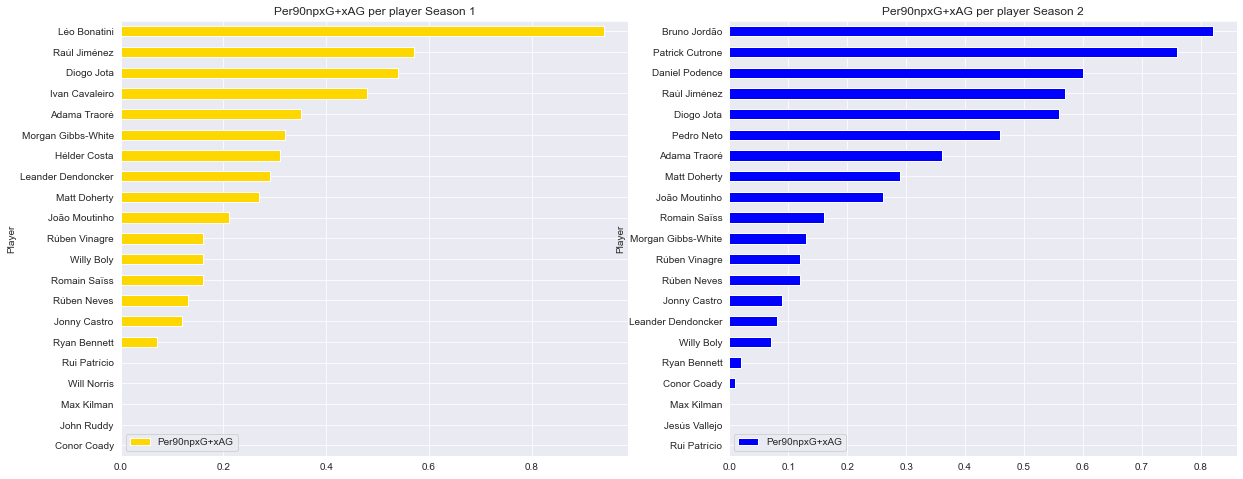

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Per90npxG+xAG')
df_c2 = df2.sort_values('Per90npxG+xAG')
df_c1.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax1, title='Per90npxG+xAG per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax2, title='Per90npxG+xAG per player Season 2',
             color='blue')
plt.show()

### Let's now compare players who played in both seasons for Wolves
By doing this, it allows us to better understand if for example a significant turnover of players or a loss of form from previously key players led to their "second season syndrome". We will focus on minutes played and per 90 metrics here.

In [25]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Per90npxG+xAG"].item()
        # subtract 2021/22 data from 2020/21 for players who played both seasons
        ## if result of this subtraction is negative then the player performance has regressed
        vals = val - df1.loc[df1['Player'] == players1[i], "Per90npxG+xAG"].item()
        d[players1[i]] = vals
    else:
        continue

In [26]:
per90commonplayers = pd.DataFrame.from_dict(d, orient='index')

In [27]:
per90commonplayers = per90commonplayers.reset_index()
per90commonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceXGXA'}, inplace = True)

In [28]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d1 = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Min"].item()
        vals = val - df1.loc[df1['Player'] == players1[i], "Min"].item()
        d1[players1[i]] = vals
    else:
        continue

In [29]:
minscommonplayers = pd.DataFrame.from_dict(d1, orient = 'index')
minscommonplayers = minscommonplayers.reset_index()
minscommonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceMins'}, inplace = True)

In [30]:
result = pd.merge(minscommonplayers, per90commonplayers, on = ["Name"])

In [31]:
result.head()

,Name,SeasonDifferenceMins,SeasonDifferenceXGXA
0,Conor Coady,0.0,0.01
1,Rui Patrício,91.0,0.00
2,Willy Boly,-1188.0,-0.09
3,Raúl Jiménez,125.0,0.00
4,Matt Doherty,-305.0,0.02


<AxesSubplot:title={'center':'Per90XG+XA Difference for Wolves Players who played in both seasons'}, xlabel='Player Name', ylabel='Per90XG+XA'>

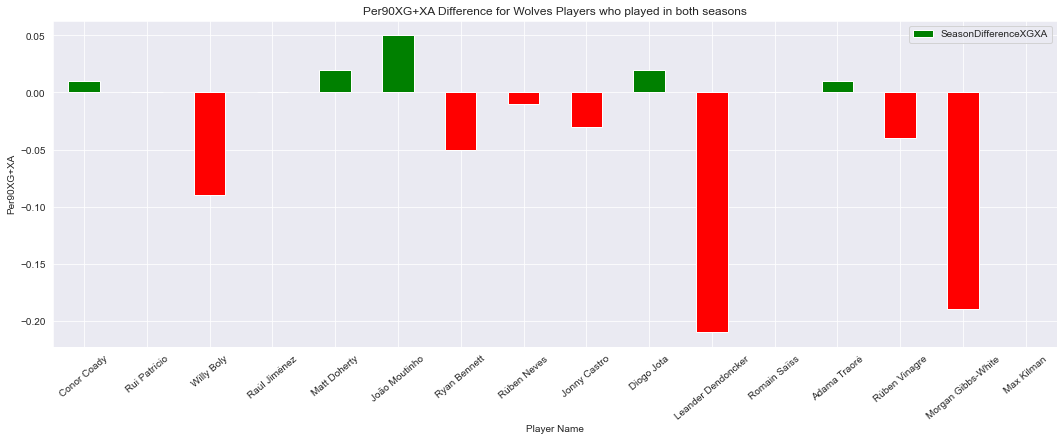

In [32]:
result.plot.bar(x = 'Name', y = 'SeasonDifferenceXGXA', rot = 40, figsize=(18, 6),
                title = 'Per90XG+XA Difference for Wolves Players who played in both seasons',
                ylabel = 'Per90XG+XA', xlabel = 'Player Name',
                color=(result['SeasonDifferenceXGXA'] > 0).map({True: 'g', False: 'r'}))

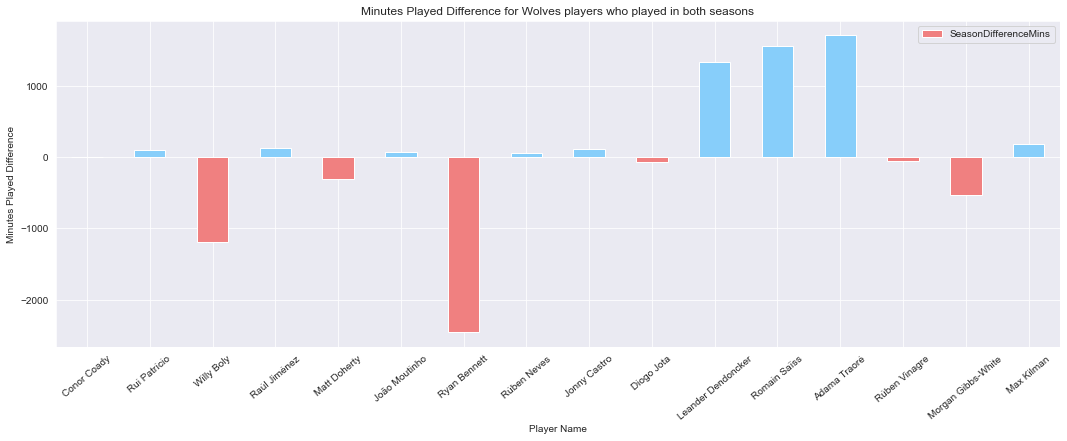

In [33]:
result.plot.bar(x = 'Name', y = "SeasonDifferenceMins", rot = 40, figsize = (18, 6),
                title = 'Minutes Played Difference for Wolves players who played in both seasons',
                ylabel = 'Minutes Played Difference', xlabel = 'Player Name',
                color = (result['SeasonDifferenceMins'] > 0).map({True: 'lightskyblue', False: 'lightcoral'}))
fig.patch.set_facecolor('white')

### Goalkeeper Analysis

In [34]:
gkseason1 = pd.read_csv("datasets/cleanedAdvanced/wolves-adkeeper1819-cleaned.csv")
gkseason2 = pd.read_csv("datasets/cleanedAdvanced/wolves-adkeeper1920-cleaned.csv")

In [35]:
gkseason1.head()

,Player,Nation,Pos,Age,90s,GA,PKA,FK,CK,OG,...,PassesAvgLen,GoalKickAtt,GoalKickLaunch%,GoalKickAvgLen,CrossesOpp,CrossesStp,CrossesStp%,Sweep#OPA,Sweep#OPA/90,SweepAvgDist
0,Rui PatrÃ­cio,pt POR,GK,30.0,37.0,46,3,1,6,4,...,39.1,284,82.7,50.5,493,14,2.8,18,0.49,12.1
1,John Ruddy,eng ENG,GK,31.0,1.0,0,0,0,0,0,...,37.9,7,85.7,49.7,15,1,6.7,0,0.00,11.0
2,Will Norris,eng ENG,GK,24.0,0.0,0,0,0,0,0,...,NaN,0,NaN,NaN,0,0,NaN,0,0.00,NaN
3,Squad Total,NaN,NaN,26.1,38.0,46,3,1,6,4,...,39.1,291,82.8,50.5,508,15,3.0,18,0.47,12.1


In [36]:
gkseason1.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'GA', 'PKA', 'FK', 'CK', 'OG',
       'ExpectedPSxG', 'ExpectedPSxG/SoT', 'ExpectedPSxG+/-', 'Expected/90',
       'LaunchedCmp', 'LaunchedAtt', 'LaunchedCmp%', 'PassesAtt', 'PassesThr',
       'PassesLaunch%', 'PassesAvgLen', 'GoalKickAtt', 'GoalKickLaunch%',
       'GoalKickAvgLen', 'CrossesOpp', 'CrossesStp', 'CrossesStp%',
       'Sweep#OPA', 'Sweep#OPA/90', 'SweepAvgDist'],
      dtype='object')

In [37]:
def compare_seasons(dffirst, dfsecond, col1, col2, string1, string2):
    # leave out last line , as this has squad totals, this function is used for player comparison across two seasons
    leavelastline_firstseason = dffirst[:-1]
    leavelastline_secondseason = dfsecond[:-1]
    season1 = list(leavelastline_firstseason[col1])
    season2 = list(leavelastline_secondseason[col1])
    dict1 = {}
    dict2 = {}
    for i in range(len(season1)):
        if season1[i] in season2:
            dict1[season1[i]] = leavelastline_firstseason.loc[leavelastline_firstseason[col1] == season1[i], col2].item()
            dict2[season1[i]] = leavelastline_secondseason.loc[leavelastline_secondseason[col1] == season1[i], col2].item()
        else:
            continue

    firstseason = pd.DataFrame.from_dict(dict1, orient = 'index')
    firstseason = firstseason.reset_index()
    firstseason.rename(columns = {'index': 'Name', 0: string1}, inplace = True)
    secondseason = pd.DataFrame.from_dict(dict2, orient = 'index')
    secondseason = secondseason.reset_index()
    secondseason.rename(columns = {'index': 'Name', 0: string2}, inplace = True)
    resultdf = pd.merge(firstseason, secondseason, on = ["Name"])
    return resultdf

In [38]:
def compare_seasons_all(dffirst, dfsecond, col1, col2, string1, string2):
    leavelastline_firstseason = dffirst
    leavelastline_secondseason = dfsecond
    season1 = list(leavelastline_firstseason[col1])
    season2 = list(leavelastline_secondseason[col1])
    dict1 = {}
    dict2 = {}
    for i in range(len(season1)):
        if season1[i] in season2:
            dict1[season1[i]] = leavelastline_firstseason.loc[leavelastline_firstseason[col1] == season1[i], col2].item()
            dict2[season1[i]] = leavelastline_secondseason.loc[leavelastline_secondseason[col1] == season1[i], col2].item()
        else:
            continue

    firstseason = pd.DataFrame.from_dict(dict1, orient = 'index')
    firstseason = firstseason.reset_index()
    firstseason.rename(columns = {'index': 'Name', 0: string1}, inplace = True)
    secondseason = pd.DataFrame.from_dict(dict2, orient = 'index')
    secondseason = secondseason.reset_index()
    secondseason.rename(columns = {'index': 'Name', 0: string2}, inplace = True)
    resultdf = pd.merge(firstseason, secondseason, on = ["Name"])
    return resultdf

In [39]:
keepersmerged = compare_seasons_all(gkseason1, gkseason2, 'Player', 'ExpectedPSxG+/-', '20-21ExpectedPSxG+/-', '21-22ExpectedPSxG+/-')

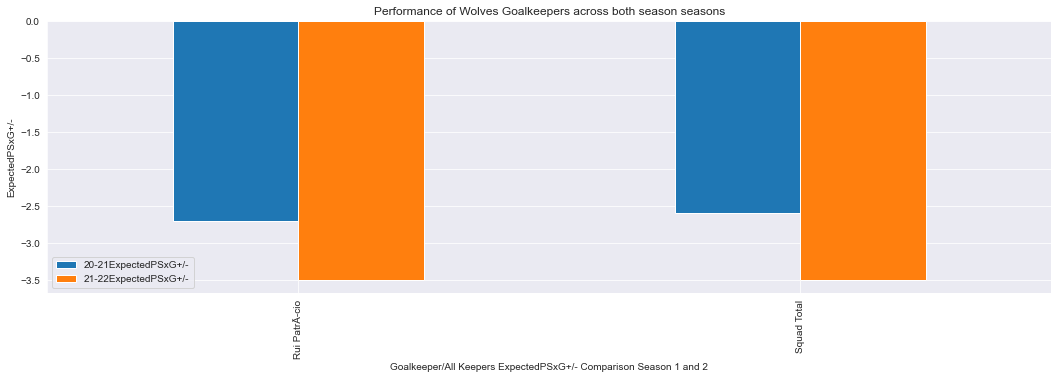

In [40]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged.set_index('Name').plot.bar()
data_chart.set_xlabel('Goalkeeper/All Keepers ExpectedPSxG+/- Comparison Season 1 and 2')
data_chart.set_ylabel('ExpectedPSxG+/-')
data_chart.set_title('Performance of Wolves Goalkeepers across both season seasons')
plt.show()

In [41]:
keepersmerged1 = compare_seasons_all(gkseason1, gkseason2, 'Player', 'PassesLaunch%', '20-21PassesLaunch', '21-22PassesLaunch')

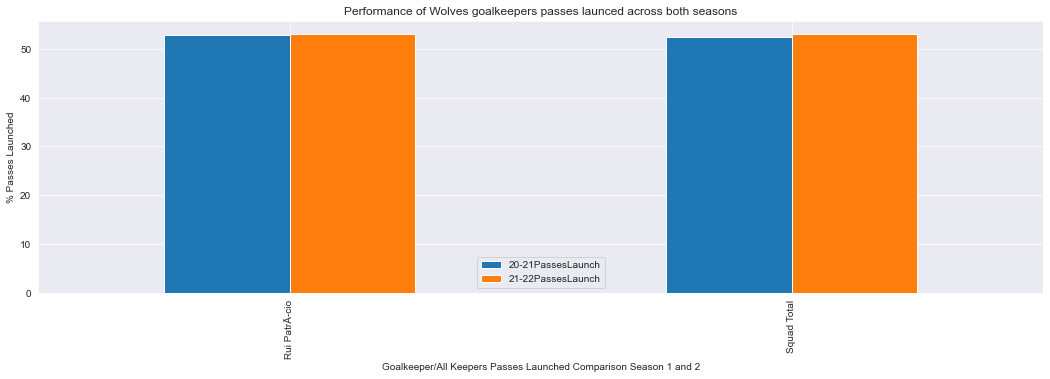

In [42]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged1.set_index('Name').plot.bar()
data_chart.set_xlabel('Goalkeeper/All Keepers Passes Launched Comparison Season 1 and 2')
data_chart.set_ylabel('% Passes Launched')
data_chart.set_title('Performance of Wolves goalkeepers passes launced across both seasons')
plt.show()

### Defensive Actions

In [43]:
defensivefirstseason = pd.read_csv("datasets/cleanedAdvanced/wolves-defensive1819-cleaned.csv")
defensivesecondseason = pd.read_csv("datasets/cleanedAdvanced/wolves-defensive1920-cleaned.csv")

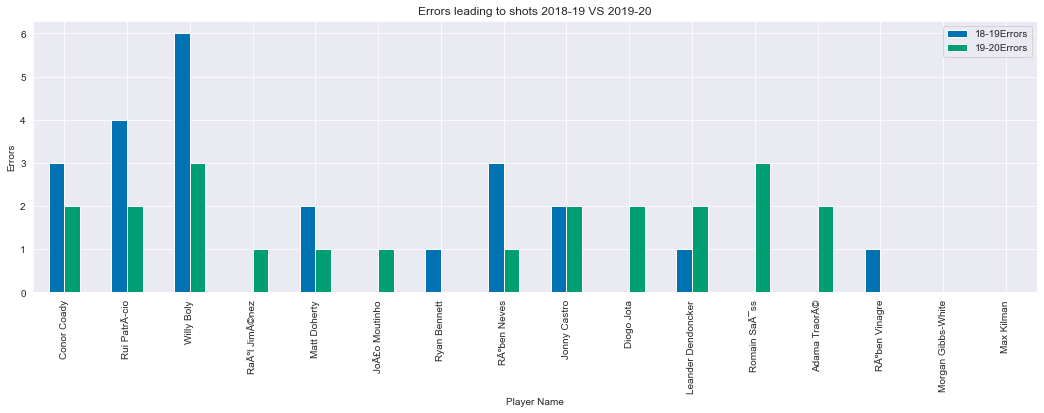

In [44]:
errorsdf = compare_seasons(defensivefirstseason, defensivesecondseason, 'Player', 'Errors', '18-19Errors', '19-20Errors')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = errorsdf.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Errors')
data_chart.set_title('Errors leading to shots 2018-19 VS 2019-20')
plt.show()

### Discipline

In [45]:
discipline_firstseason = pd.read_csv("datasets/cleanedAdvanced/wolves-miscell1819-cleaned.csv")
discipline_secondseason = pd.read_csv("datasets/cleanedAdvanced/wolves-miscell1920-cleaned.csv")

In [46]:
discipline_firstseason.tail(2)

,Player,Nation,Pos,Age,90s,CrdY,CrdR,2CrdY,Fls,Fld,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,AerialDuelWon,AerielDuelLost,AerialDuelWon%
20,Will Norris,eng ENG,GK,24.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
21,Squad Total,NaN,NaN,26.1,38.0,73,1,0,409,325,...,622,501,408,4,4,4,2239,803,788,50.5


In [47]:
discipline_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CrdY', 'CrdR', '2CrdY', 'Fls',
       'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov',
       'AerialDuelWon', 'AerielDuelLost', 'AerialDuelWon%'],
      dtype='object')

In [48]:
discipline_firstseason_cards1 = discipline_firstseason[-1:]

In [49]:
discipline_secondseason_cards2 = discipline_secondseason[-1:]

In [50]:
discipline_firstseason_cards = discipline_firstseason_cards1[['Player', 'CrdY', 'CrdR']]
discipline_secondseason_cards = discipline_secondseason_cards2[['Player', 'CrdY', 'CrdR']]

In [51]:
discipline_firstseason_cards = discipline_firstseason_cards.replace("Squad Total", "Season 1 Total")
discipline_secondseason_cards = discipline_secondseason_cards.replace("Squad Total", "Season 2 Total")

In [52]:
overall_discipline = pd.concat([discipline_firstseason_cards, discipline_secondseason_cards])

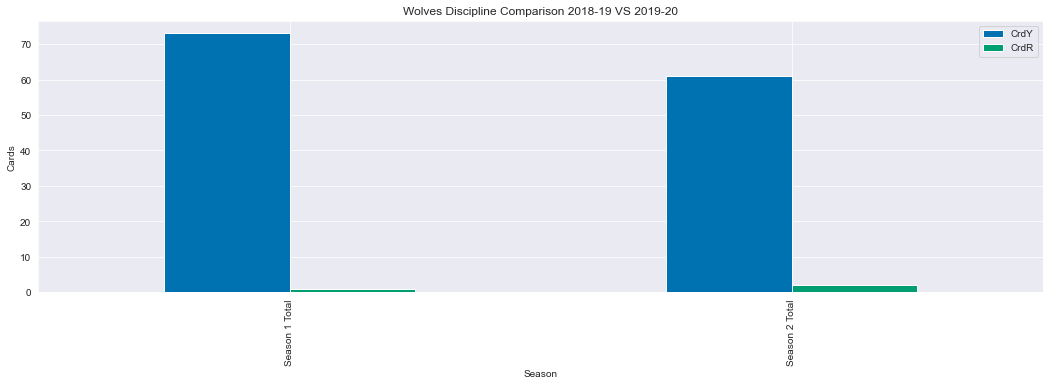

In [53]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_discipline.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Cards')
data_chart.set_title('Wolves Discipline Comparison 2018-19 VS 2019-20')
plt.show()

In [54]:
# aerial duels comparison
discipline_firstseason_duels = discipline_firstseason_cards1[['Player', 'AerialDuelWon%']]
discipline_secondseason_duels = discipline_secondseason_cards2[['Player', 'AerialDuelWon%']]

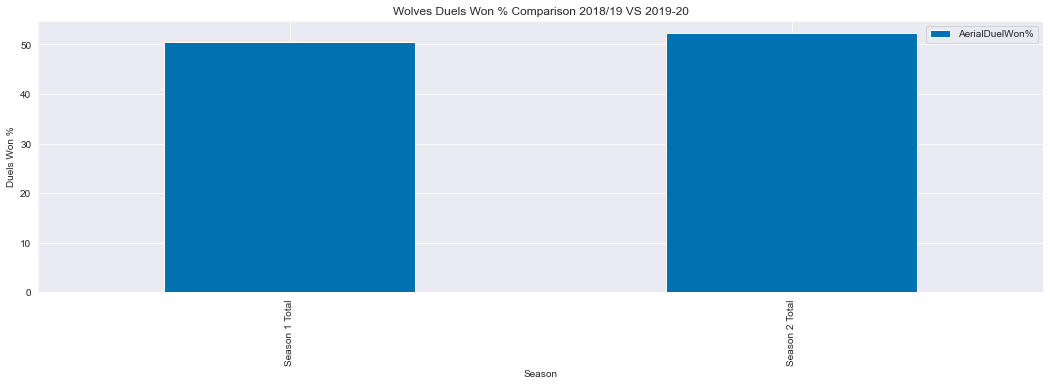

In [55]:
discipline_firstseason_duels = discipline_firstseason_duels.replace("Squad Total", "Season 1 Total")
discipline_secondseason_duels = discipline_secondseason_duels.replace("Squad Total", "Season 2 Total")
overall_duels = pd.concat([discipline_firstseason_duels, discipline_secondseason_duels])
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_duels.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Duels Won %')
data_chart.set_title('Wolves Duels Won % Comparison 2018/19 VS 2019-20')
plt.show()

### XG Comparison - For/Against

In [56]:
for_against_first = dftotals1.iloc[-2:]
for_against_second = dftotals2.iloc[-2:]

In [57]:
dftotals1.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
18,Léo Bonatini,br BRA,FW,24.0,7,0,135,1.5,0,1,...,0.67,1.3,1.3,0.1,1.4,0.85,0.09,0.94,0.85,0.94
19,Max Kilman,eng ENG,DF,21.0,1,0,1,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
20,Will Norris,eng ENG,GK,24.0,1,0,1,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
21,Squad Total,NaN,NaN,26.1,38,418,3420,38.0,46,35,...,2.03,52.1,49.0,39.4,88.4,1.37,1.04,2.41,1.29,2.33
22,Opponent Total,NaN,NaN,26.8,38,418,3420,38.0,42,32,...,1.87,42.1,39.0,27.7,66.7,1.11,0.73,1.84,1.03,1.76


In [58]:
comp1 = for_against_first[['Player', 'Gls', 'xG']]
comp2 = for_against_second[['Player', 'Gls', 'xG']]

In [59]:
comp1.replace({'Squad Total': 'SquadTotalSeason1', 'Opponent Total': 'OpponentTotalSeason1'}, inplace = True)
comp2.replace({'Squad Total': 'SquadTotalSeason2', 'Opponent Total': 'OpponentTotalSeason2'}, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [60]:
overall_xg = pd.concat([comp1, comp2])
overall_xg

,Player,Gls,xG
21,SquadTotalSeason1,46.0,52.1
22,OpponentTotalSeason1,42.0,42.1
29,SquadTotalSeason2,49.0,54.1
30,OpponentTotalSeason2,39.0,38.0


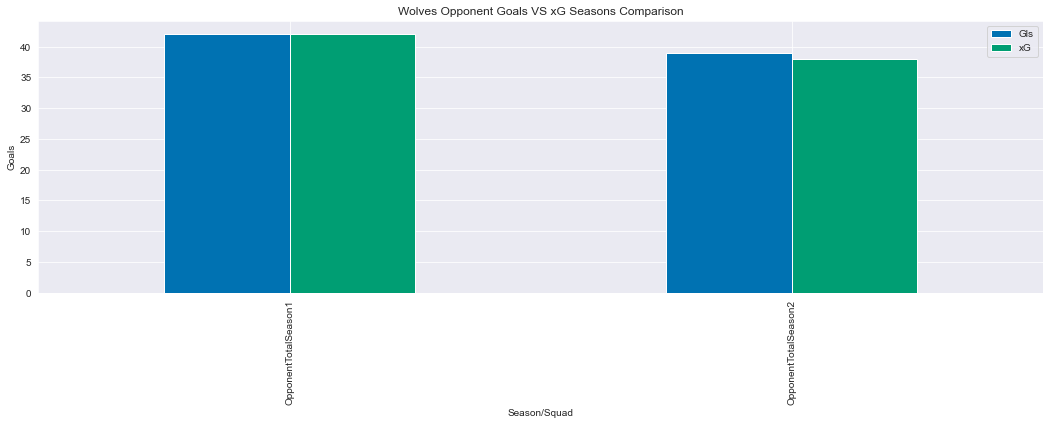

In [61]:
overall_xg_opp = overall_xg.loc[overall_xg['Player'].str.contains('Opponent')]
overall_xg_opp = overall_xg_opp.sort_values('Player')
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_xg_opp.set_index('Player').plot.bar()
data_chart.set_xlabel('Season/Squad')
data_chart.set_ylabel('Goals')
data_chart.set_title('Wolves Opponent Goals VS xG Seasons Comparison')
plt.show()

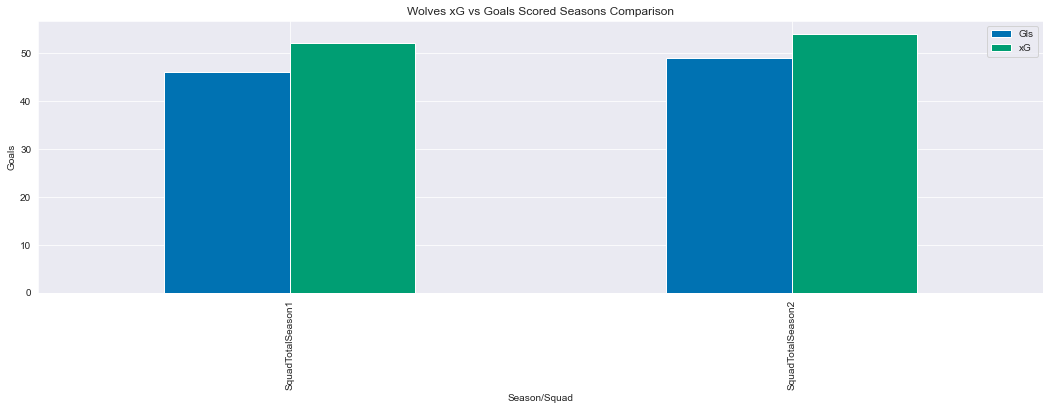

In [94]:
overall_xg_lee = overall_xg.loc[overall_xg['Player'].str.contains('SquadTotalSeason')]
overall_xg_lee = overall_xg_lee.sort_values('Player')
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_xg_lee.set_index('Player').plot.bar()
data_chart.set_xlabel('Season/Squad')
data_chart.set_ylabel('Goals')
data_chart.set_title('Wolves xG vs Goals Scored Seasons Comparison')
plt.show()

### Goal and Shot Creation

In [63]:
shotcreate_firstseason = pd.read_csv("datasets/cleanedAdvanced/wolves-shootcreate1819-cleaned.csv")
shotcreate_secondseason = pd.read_csv("datasets/cleanedAdvanced/wolves-shootcreate1920-cleaned.csv")

In [64]:
shotcreate_firstseason.head()

,Player,Nation,Pos,Age,90s,SCA,SCA90,PassLive,PassDead,Drib,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,Conor Coady,eng ENG,DF,25.0,38.0,21,0.55,20,0,0,...,0,1,2,0.05,2,0,0,0,0,0
1,Rui PatrÃ­cio,pt POR,GK,30.0,37.0,1,0.03,1,0,0,...,0,0,0,0.00,0,0,0,0,0,0
2,Willy Boly,ci CIV,DF,27.0,35.2,29,0.82,25,0,0,...,0,1,0,0.00,0,0,0,0,0,0
3,RaÃºl JimÃ©nez,mx MEX,FW,27.0,34.6,88,2.55,70,0,7,...,3,1,11,0.32,9,0,0,1,1,0
4,Matt Doherty,ie IRL,DFMF,26.0,34.9,95,2.72,70,6,3,...,6,2,10,0.29,7,0,1,0,2,0


In [65]:
shotcreate_firstseason1 = shotcreate_firstseason[['Player', 'Pos', 'SCA', 'SCA90', 'GCA', 'GCA90']]
shotcreate_secondseason2 = shotcreate_secondseason[['Player', 'Pos', 'SCA', 'SCA90', 'GCA', 'GCA90']]

In [66]:
shotcreate_firstseason1 = shotcreate_firstseason1[:-1]
shotcreate_secondseason2 = shotcreate_secondseason2[:-1]

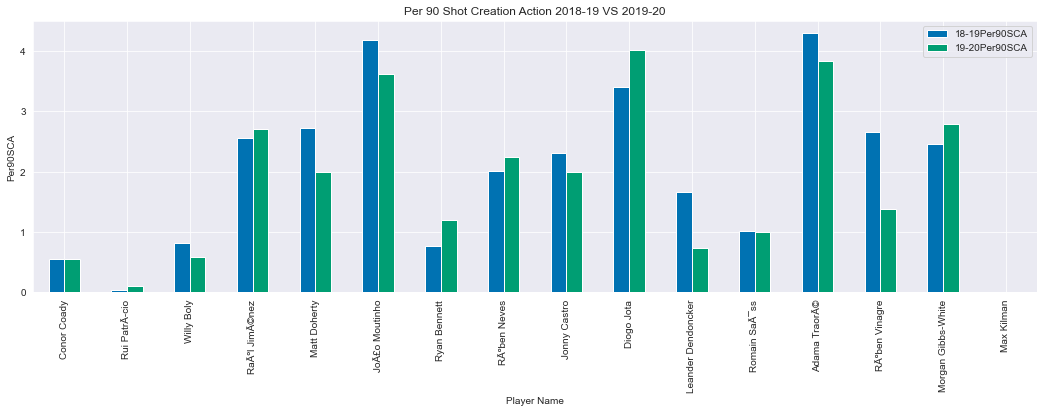

In [67]:
resultsca = compare_seasons(shotcreate_firstseason1, shotcreate_secondseason2, 'Player', 'SCA90', '18-19Per90SCA', '19-20Per90SCA')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = resultsca.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90SCA')
data_chart.set_title('Per 90 Shot Creation Action 2018-19 VS 2019-20')
plt.show()

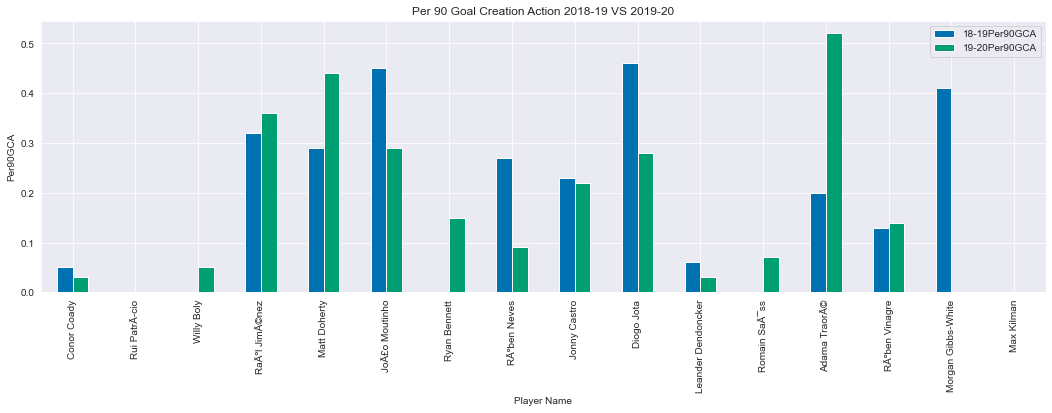

In [68]:
resultgca = compare_seasons(shotcreate_firstseason1, shotcreate_secondseason2, 'Player', 'GCA90', '18-19Per90GCA', '19-20Per90GCA')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = resultgca.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90GCA')
data_chart.set_title('Per 90 Goal Creation Action 2018-19 VS 2019-20')
plt.show()

In [69]:
defensivefirstseason.head(1)

,Player,Nation,Pos,Age,90s,Tkl,TklWon,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,...,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,Blocks,ShotBlock,PassBlock,Interceptions,Tkl+Int,Clearances,Errors
0,Conor Coady,eng ENG,DF,25.0,38.0,31,19,26,5,0,...,32,53.1,15,35,27,8,30,61,133,3


In [70]:
lst_results = []
def create_90_val(df, col1, col2, lst):
    nineties = list(df[col1])
    metric = list(df[col2])
    for i in range(len(nineties)):
        if nineties[i] > 0:
            val_per_90 = metric[i] / nineties[i]
            lst.append(val_per_90)
        else:
            lst.append(0)
    return lst

In [71]:
val_s1 = create_90_val(defensivefirstseason, '90s', 'Interceptions', lst_results)
defensivefirstseason['InterceptionsPer90'] = val_s1

In [72]:
lst_res2 = []
val_s2 = create_90_val(defensivesecondseason, '90s', 'Interceptions', lst_res2)
defensivesecondseason['InterceptionsPer90'] = val_s2

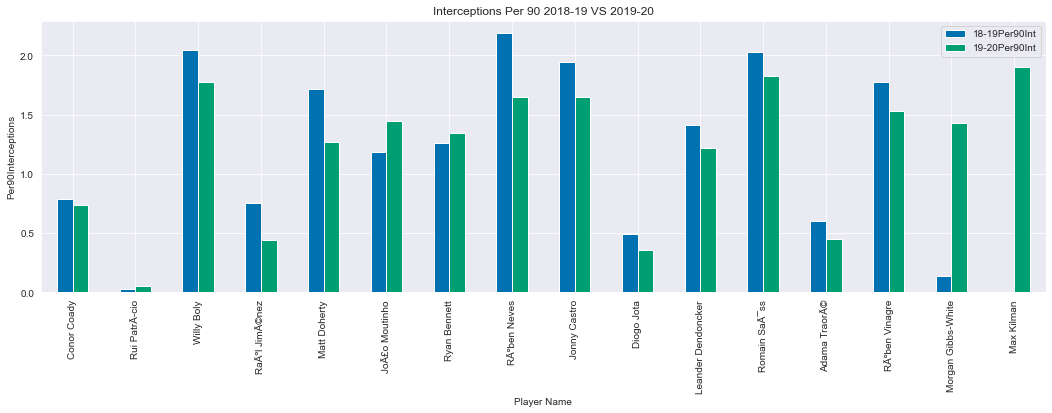

In [73]:
interceptions_per_90_comp = compare_seasons(defensivefirstseason, defensivesecondseason, 'Player', 'InterceptionsPer90', '18-19Per90Int', '19-20Per90Int')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = interceptions_per_90_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90Interceptions')
data_chart.set_title('Interceptions Per 90 2018-19 VS 2019-20')
plt.show()

### xG Per Shot

In [74]:
shot_firstseason = pd.read_csv("datasets/cleanedAdvanced/wolves-shoot1819-cleaned.csv")
shot_secondseason = pd.read_csv("datasets/cleanedAdvanced/wolves-shoot1920-cleaned.csv")

In [75]:
shot_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')

In [76]:
## shots total does not include penalties

In [77]:
lst_res3 = []
shotfirst = create_90_val(shot_firstseason, 'Sh', 'xG', lst_res3)
shot_firstseason['xGPerShot'] = shotfirst

In [78]:
shot_firstseason.head(1)

,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,xGPerShot
0,Conor Coady,eng ENG,DF,25.0,38.0,0,0,0,NaN,0.0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0


In [79]:
lst_res4 = []
shotsecond = create_90_val(shot_secondseason, 'Sh', 'xG', lst_res4)
shot_secondseason['xGPerShot'] = shotsecond

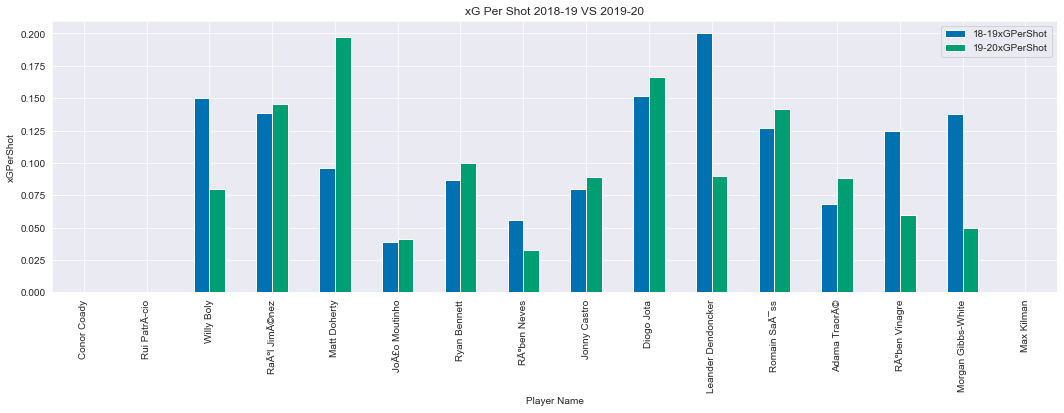

In [80]:
xg_per_shot_comp = compare_seasons(shot_firstseason, shot_secondseason, 'Player', 'xGPerShot', '18-19xGPerShot', '19-20xGPerShot')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = xg_per_shot_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('xGPerShot')
data_chart.set_title('xG Per Shot 2018-19 VS 2019-20')
plt.show()

### Passing Breakdown

In [81]:
pass_firstseason = pd.read_csv('datasets/cleanedAdvanced/wolves-pass1819-cleaned.csv')
pass_secondseason = pd.read_csv('datasets/cleanedAdvanced/wolves-pass1920-cleaned.csv')

In [82]:
pass_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CmpTotal', 'AttemptedTotal',
       'Cmp%Total', 'TotDist', 'ProgressiveDist', 'ShortCmp', 'ShortAttempted',
       'ShortCmp%', 'MediumCmp', 'MediumAttempt', 'MediumCmp%', 'LongCmp',
       'LongAttempted', 'LongCmp%', 'Assists', 'xAG', 'xA', 'A-xAG',
       'KeyPasses', 'CompletedFinalThird', 'PassesPenaltyArea', 'CrossesPA',
       'ProgressivePasses'],
      dtype='object')

In [83]:
pass_firstseason.head(1)

,Player,Nation,Pos,Age,90s,CmpTotal,AttemptedTotal,Cmp%Total,TotDist,ProgressiveDist,...,LongCmp%,Assists,xAG,xA,A-xAG,KeyPasses,CompletedFinalThird,PassesPenaltyArea,CrossesPA,ProgressivePasses
0,Conor Coady,eng ENG,DF,25.0,38.0,1427,1700,83.9,34672,14770,...,68.5,0,0.0,0.4,0.0,1,104,5,0,66


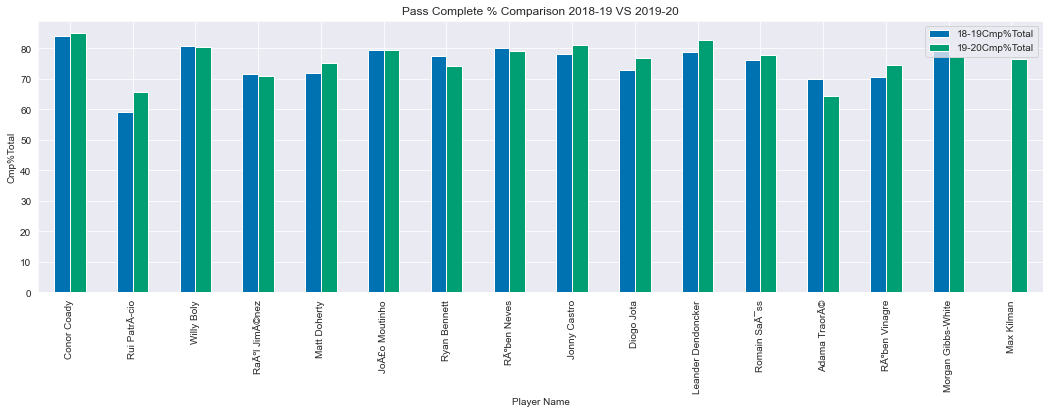

In [84]:
pass_cmp_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'Cmp%Total', '18-19Cmp%Total', '19-20Cmp%Total')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = pass_cmp_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Cmp%Total')
data_chart.set_title('Pass Complete % Comparison 2018-19 VS 2019-20')
plt.show()

In [85]:
### add more comments later for above.
#### lets investigate how many more long balls were attempted as a % of attempted passes -> potential loss of control if higher
#### average progressive distance of passes too

In [86]:
lst_res5 = []
progpassfirst = create_90_val(pass_firstseason, 'CmpTotal', 'ProgressiveDist', lst_res5)
pass_firstseason['AvgProgressiveDist'] = progpassfirst

In [87]:
lst_res6 = []
progpasssecond = create_90_val(pass_secondseason, 'CmpTotal', 'ProgressiveDist', lst_res6)
pass_secondseason['AvgProgressiveDist'] = progpasssecond

In [88]:
pass_secondseason.head(1)

,Player,Nation,Pos,Age,90s,CmpTotal,AttemptedTotal,Cmp%Total,TotDist,ProgressiveDist,...,Assists,xAG,xA,A-xAG,KeyPasses,CompletedFinalThird,PassesPenaltyArea,CrossesPA,ProgressivePasses,AvgProgressiveDist
0,Conor Coady,eng ENG,DF,26.0,38.0,1573,1853,84.9,38135,17275,...,0,0.5,0.6,-0.5,5,112,7,0,56,10.9822


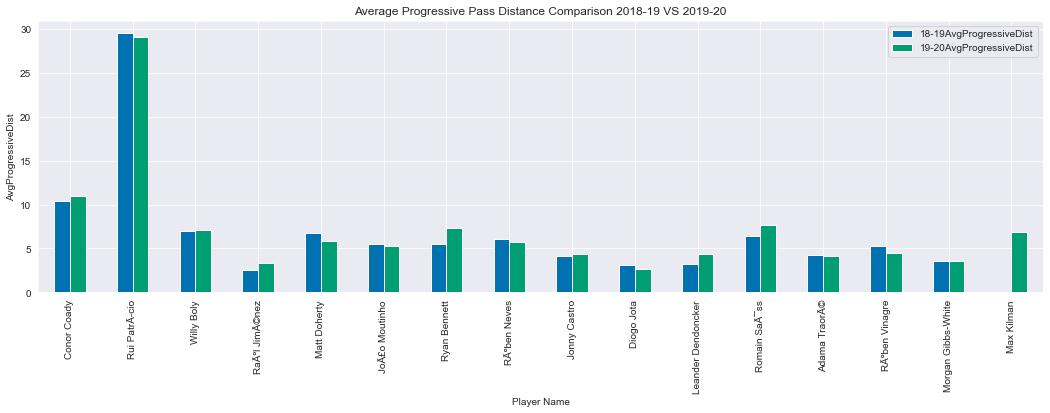

In [89]:
## compare average progression per pass completed over two season
avg_passdist_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'AvgProgressiveDist', '18-19AvgProgressiveDist', '19-20AvgProgressiveDist')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = avg_passdist_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('AvgProgressiveDist')
data_chart.set_title('Average Progressive Pass Distance Comparison 2018-19 VS 2019-20')
plt.show()

In [90]:
### now for percentage long balls

In [91]:
lst_res8 = []
longpassfirst = create_90_val(pass_firstseason, 'AttemptedTotal', 'LongAttempted', lst_res8)
pass_firstseason['PercentageLongAtt'] = longpassfirst

In [92]:
lst_res9 = []
longpasssecond = create_90_val(pass_secondseason, 'AttemptedTotal', 'LongAttempted', lst_res9)
pass_secondseason['PercentageLongAtt'] = longpasssecond

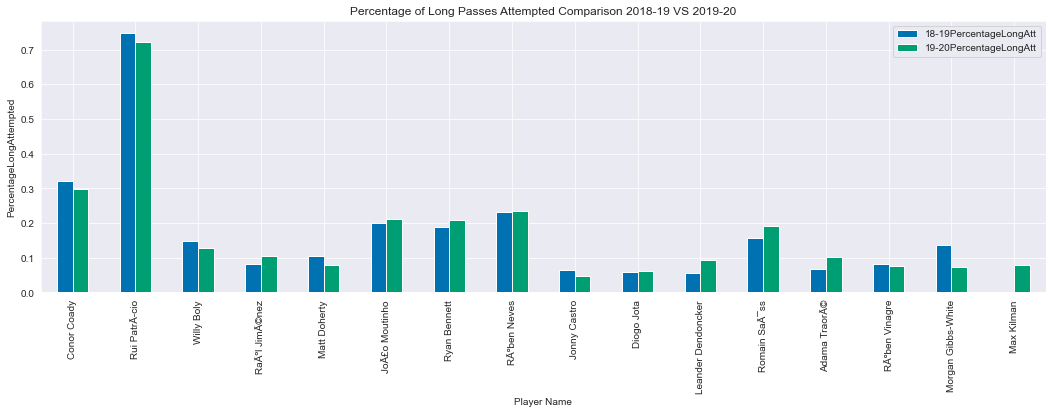

In [93]:
## compare attempted long passes as proportion of total attempted passes over two season
longpass_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'PercentageLongAtt', '18-19PercentageLongAtt', '19-20PercentageLongAtt')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = longpass_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('PercentageLongAttempted')
data_chart.set_title('Percentage of Long Passes Attempted Comparison 2018-19 VS 2019-20')
plt.show()